# ParSNIP novel transient detection

This notebook demonstrates how novel transients could be identified using the ParSNIP model. The ParSNIP representation is designed to capture only intrinsic properties of transients. Transients that are far away in the ParSNIP representation from a set of known objects therefore have very different intrinsic physics. We use the distance to the nearest known object in the ParSNIP representation as a measure of "weirdness", and show that this measure identifies many of the simulated novel transients in the PLAsTiCC dataset.

# Load all of the models and data

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table
from scipy.spatial import cKDTree

import parsnip

In [2]:
# Load the training and full data sets
predictions_train = Table.read('../predictions/parsnip_predictions_plasticc_train_aug_100.h5')
predictions_full = Table.read('../predictions/parsnip_predictions_plasticc_test.h5')

(-7.0, 6.0)

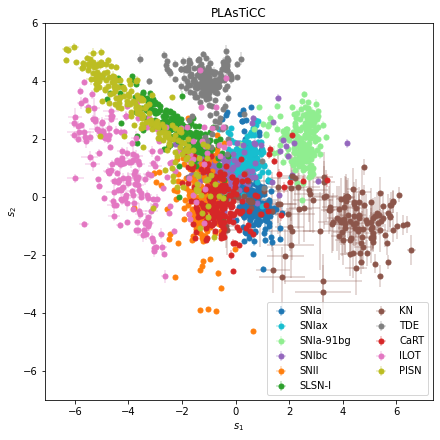

In [3]:
# Show the distributions of all of the transients.
# The CaRT, ILOT and PISN classes are "novel", and weren't included in the PLAsTiCC training set.
plasticc_plot_labels = ['SNIa', 'SNIax', 'SNIa-91bg', 'SNIbc', 'SNII', 'SLSN-I', 'KN', 'TDE', 'CaRT', 'ILOT', 'PISN']

use_pred = predictions_full.copy()
use_pred.sort('total_s2n', reverse=True)
parsnip.plot_representation(use_pred, plasticc_plot_labels, idx1=1, idx2=2, max_count=200, legend_ncol=2)
plt.title('PLAsTiCC')
plt.ylim(-7, 6)

# Look at the objects that are farthest from everything else

In [4]:
# Train a KDTree on the training set to quickly measure distances
tobs = cKDTree(np.array([predictions_train['s1'], predictions_train['s2'], predictions_train['s3']]).T)

In [5]:
# Show classes for our top 100 largest "outliers"
dist, indices = tobs.query(np.array([predictions_full['s1'], predictions_full['s2'], predictions_full['s3']]).T)
best_types = predictions_full[np.argsort(dist)[-100:]]['type'].data
Table(np.unique(best_types, return_counts=True))

col0,col1
bytes9,int64
ILOT,87
PISN,3
SLSN-I,2
SNII,6
SNIbc,2


In [6]:
# Calculate how much we have purified this dataset of novel objects compared to the original dataset.
novel_types = [b'ILOT', b'PISN', b'CaRT']
amplification = (
    (np.sum(np.isin(best_types, novel_types)) / len(best_types))
    / (np.sum(np.isin(predictions_full['type'], novel_types)) / len(predictions_full))
)
print(f"Amplification factor: {amplification:.2f}")

Amplification factor: 215.14
